<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Heart_attack_possibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# load the dataset
data = pd.read_csv('heart.csv')

data.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.shape
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns.")

Data has 303 rows and 14 columns.


In [ ]:
# check for missing values
missing_values = data.isna().values.any()
print(f"Missing values in the data frame? : {missing_values}")

Missing values in the data frame? : False


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no any missing values in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
import matplotlib.pyplot as plt

data_by_sex = data.groupby('target')['sex'].value_counts()


In [ ]:
data_by_sex

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: count, dtype: int64

In [ ]:
# show value of each bar
def add_labls_price(x,y):
  for k in range(len(x)):
    plt.text(k,y[k],'$'+str(round(y[k],2)),ha='center',va='bottom')

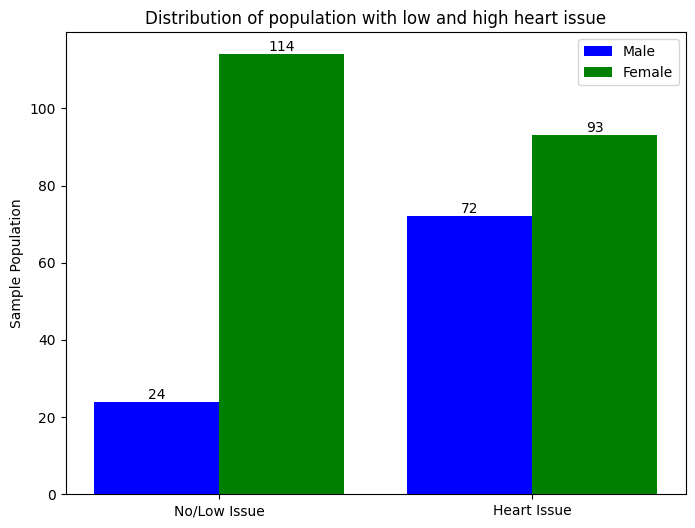

In [ ]:
import numpy as np
low_heart_issue_male = data_by_sex[0, 0]
low_heart_issue_female = data_by_sex[0, 1]

heart_issue_male = data_by_sex[1,   0]
heart_issue_female = data_by_sex[1,   1]

male_counts = [low_heart_issue_male,heart_issue_male]
female_counts = [low_heart_issue_female,heart_issue_female]

# show value of each bar
def add_labls_multibar(x,y,z):
  for k in range(len(x)):
    plt.text(x[k]-0.2,y[k],y[k],ha='center',va='bottom')
    plt.text(x[k]+0.2,z[k],z[k],ha='center',va='bottom')

# plot bar chart
x_labels_list = ['No/Low Issue', 'Heart Issue']
x = np.arange(len(x_labels_list))
width=0.4

plt.figure(figsize=(8,6))
plt.bar(x-0.2,male_counts,color='blue',label='Male',width=width)
plt.bar(x+0.2,female_counts,color='green',label='Female',width=width)
plt.xticks(x,x_labels_list)
add_labls_multibar(x,male_counts,female_counts)

plt.ylabel('Sample Population')
plt.title('Distribution of population with low and high heart issue')
plt.legend()
plt.show()

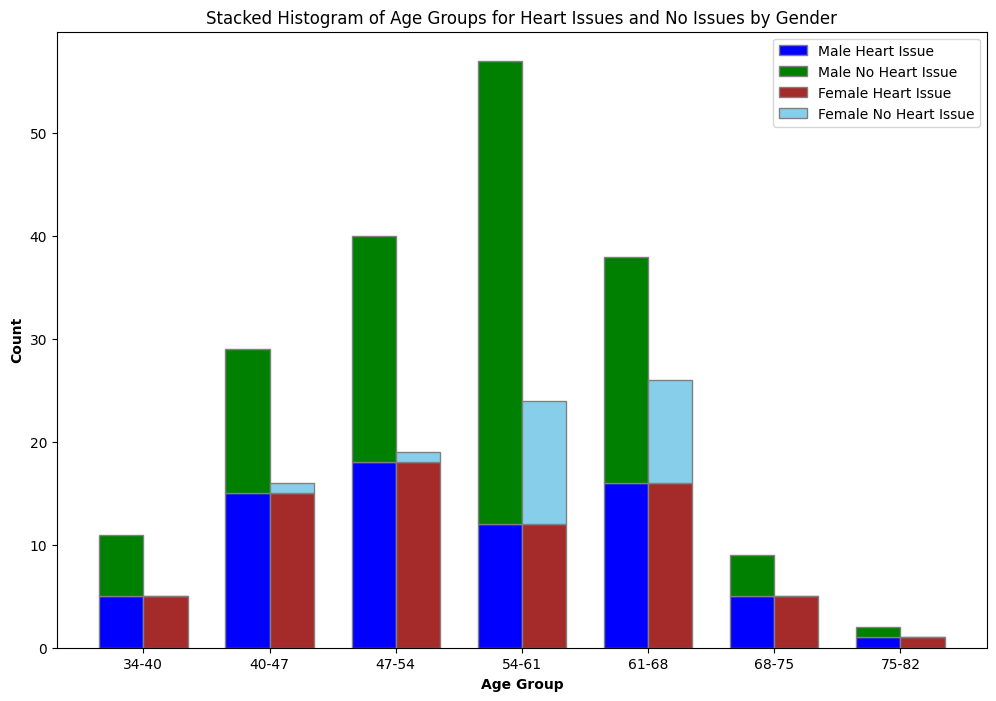

In [ ]:
# Calculate the bins
min_age = data['age'].min()
max_age = data['age'].max()
bins = np.linspace(min_age + 5, max_age + 5, 8)
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Create a new column 'age_group' for the bins
# right = false makes upper bound not inclusive
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and calculate counts for 'sex' and 'target'
age_grouped = data.groupby('age_group').agg(
    male_heart_issue=('target', lambda x: ((data['sex'] == 0) & (x == 1)).sum()),
    male_no_heart_issue=('target', lambda x: ((data['sex'] == 1) & (x == 0)).sum()),
    female_heart_issue=('target', lambda x: ((data['sex'] == 0) & (x == 1)).sum()),
    female_no_heart_issue=('target', lambda x: ((data['sex'] == 0) & (x == 0)).sum())
).reset_index()

# Plot the stacked histogram for males with heart issues and no issues
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Set positions of bars on X axis
r1 = range(len(age_grouped))

# Make the plot for males
plt.bar(r1, age_grouped['male_heart_issue'], color='b', width=bar_width, edgecolor='grey', label='Male Heart Issue')
plt.bar(r1, age_grouped['male_no_heart_issue'], color='g', width=bar_width, edgecolor='grey', label='Male No Heart Issue', bottom=age_grouped['male_heart_issue'])

# Set positions of bars on X axis for females
r2 = [x + bar_width for x in r1]

# Make the plot for females
plt.bar(r2, age_grouped['female_heart_issue'], color='brown', width=bar_width, edgecolor='grey', label='Female Heart Issue')
plt.bar(r2, age_grouped['female_no_heart_issue'], color='skyblue', width=bar_width, edgecolor='grey', label='Female No Heart Issue', bottom=age_grouped['female_heart_issue'])

# Add xticks on the middle of the group bars
plt.xlabel('Age Group', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(age_grouped))], age_grouped['age_group'])

# Add labels and title
plt.ylabel('Count', fontweight='bold')
plt.title('Stacked Histogram of Age Groups for Heart Issues and No Issues by Gender')

# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# Seperate the labels and Features from the dataset
Y = data['target']

X = data.drop(['age_group','target'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# bringing the numerical datas to normal range
scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[5.43663366e+01 6.83168317e-01 9.66996700e-01 1.31623762e+02
 2.46264026e+02 1.48514851e-01 5.28052805e-01 1.49646865e+02
 3.26732673e-01 1.03960396e+00 1.39933993e+00 7.29372937e-01
 2.31353135e+00]


In [ ]:
X_features = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_features,Y,test_size=.2)


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

knn = KNeighborsClassifier()

# Model TRAINING
knn.fit(X_train,y_train)

# Model PREDICTION
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test[1])

# Accuracy of the model
accuracy_knn = accuracy_score(y_test,pred_labels_knn)
accuracy_knn = round(accuracy_knn * 100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

# confusion matrix
knn_cm = confusion_matrix(y_test,pred_labels_knn)
print("confusion matrix:")
print(knn_cm,'\n')

# precision_score
knn_ps = precision_score(y_test,pred_labels_knn,average='micro')
print(f"The precision_score of the KNN Model is {round(knn_ps,4)}")


# recall score
knn_rs = recall_score(y_test,pred_labels_knn,average='micro')
print(f"The recall score of the KNN Model is {round(knn_rs,4)}")


# f1 score
knn_fs = f1_score(y_test,pred_labels_knn,average='micro')
print(f"The f1 score of the KNN Model is {round(knn_fs,4)}")


0
1
The accuracy of the KNN Model is 78.69%
confusion matrix:
[[20  8]
 [ 5 28]] 

The precision_score of the KNN Model is 0.7869
The recall score of the KNN Model is 0.7869
The f1 score of the KNN Model is 0.7869


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)

# Accuracy of the model
accuracy_tree = accuracy_score(y_test,pred_labels_dec_tree)
accuracy_tree = round(accuracy_tree * 100,2)
print(f"The accuracy of the Decision Tree is {accuracy_tree}%")


The accuracy of the Decision Tree is 77.05%


In [ ]:
# confusion matrix
dt_cm = confusion_matrix(y_test,pred_labels_dec_tree)
print("confusion matrix:")
print(dt_cm,'\n')

# precision_score
dt_ps = precision_score(y_test,pred_labels_dec_tree,average='weighted')
print(f"The precision_score of the decision tree is {round(dt_ps,4)}")

# recall score
dt_rs = recall_score(y_test,pred_labels_dec_tree,average='weighted')
print(f"The precision_score of the decision tree is {round(dt_rs,4)}")

# f1 score
dt_fs = f1_score(y_test,pred_labels_dec_tree,average='weighted')
print(f"The precision_score of the decision tree is {round(dt_fs,4)}")

confusion matrix:
[[21  7]
 [ 7 26]] 

The precision_score of the decision tree is 0.7705
The precision_score of the decision tree is 0.7705
The precision_score of the decision tree is 0.7705


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape

# Accuracy of the model
accuracy_ran_forest= accuracy_score(y_test,pred_lbls_rf)
accuracy_ran_forest = round(accuracy_ran_forest * 100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_ran_forest}%")


The accuracy of the Random Forest Model is 80.33%


In [ ]:
# confusion matrix
rf_cm = confusion_matrix(y_test,pred_lbls_rf)
print("confusion matrix:")
print(rf_cm,'\n')

# precision_score
rf_ps = precision_score(y_test,pred_lbls_rf,average='weighted')
print(f"The precision_score of the random forest is {round(rf_ps,4)}")

# recall score
rf_rs = recall_score(y_test,pred_lbls_rf,average='weighted')
print(f"The precision_score of the random forest is {round(rf_rs,4)}")

# f1 score
rf_fs = f1_score(y_test,pred_lbls_rf,average='weighted')
print(f"The precision_score of the random forest is {round(rf_fs,4)}")

confusion matrix:
[[21  7]
 [ 5 28]] 

The precision_score of the random forest is 0.8035
The precision_score of the random forest is 0.8033
The precision_score of the random forest is 0.8025


In [ ]:
# XGBoost
from xgboost import XGBClassifier

# Instantiation
model = XGBClassifier()

# Fitting the model
model.fit(X_train, y_train)

# Predict the model
pred_lbls_xg = model.predict(X_test)


# Accuracy of the model
accuracy_xg= accuracy_score(y_test,pred_lbls_xg)
accuracy_xg = round(accuracy_xg * 100,2)
print(f"The accuracy of the XGBoost Model is {accuracy_xg}%")

# confusion matrix
xg_cm = confusion_matrix(y_test,pred_lbls_xg)
print("confusion matrix:")
print(xg_cm,'\n')

# precision_score
xg_ps = precision_score(y_test,pred_lbls_xg,average='weighted')
print(f"The precision_score of the XGBoost Model is {round(xg_ps,4)}")

# recall score
xg_rs = recall_score(y_test,pred_lbls_xg,average='weighted')
print(f"The precision_score of the XGBoost Model is {round(xg_rs,4)}")

# f1 score
xg_fs = f1_score(y_test,pred_lbls_xg,average='weighted')
print(f"The precision_score of the XGBoost Model is {round(xg_fs,4)}")

The accuracy of the XGBoost Model is 80.33%
confusion matrix:
[[22  6]
 [ 6 27]] 

The precision_score of the XGBoost Model is 0.8033
The precision_score of the XGBoost Model is 0.8033
The precision_score of the XGBoost Model is 0.8033


In [ ]:
# SVM
from sklearn.svm import SVC

# Instantiation
svm = SVC()

# Model Training
svm.fit(X_train, y_train)

# Model Prediction
pred_labels_svm = svm.predict(X_test)

# Accuracy of the model
accuracy_svm = accuracy_score(y_test, pred_labels_svm)
accuracy_svm = round(accuracy_svm * 100, 2)
print(f"The accuracy of the SVM Model is {accuracy_svm}%")

# confusion matrix
svm_cm = confusion_matrix(y_test, pred_labels_svm)
print("confusion matrix:")
print(svm_cm, '\n')

# precision_score
svm_ps = precision_score(y_test, pred_labels_svm, average='weighted')
print(f"The precision_score of the SVM Model is {round(svm_ps, 4)}")

# recall score
svm_rs = recall_score(y_test, pred_labels_svm, average='weighted')
print(f"The recall score of the SVM Model is {round(svm_rs, 4)}")

# f1 score
svm_fs = f1_score(y_test, pred_labels_svm, average='weighted')
print(f"The f1 score of the SVM Model is {round(svm_fs, 4)}")

The accuracy of the SVM Model is 78.69%
confusion matrix:
[[20  8]
 [ 5 28]] 

The precision_score of the SVM Model is 0.788
The recall score of the SVM Model is 0.7869
The f1 score of the SVM Model is 0.7855


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Implementing Neural Network
model = Sequential()

# Input Layer with input size 13
model.add(Dense(64,input_shape=(13,),activation='relu'))

# Hidden Layer
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
25/25 [==============================] - 2s 4ms/step - loss: 0.6789 - accuracy: 0.5992
Epoch 2/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5877 - accuracy: 0.6777
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.8140
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8802
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.9050
Epoch 6/150
25/25 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.9050
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.9132
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9215
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9174
Epoch 10/150
25/25 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9298
Epoch 11/

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Evaluate the Model
_,accuracy_nn = model.evaluate(X_test,y_test)
accuracy_nn = round(accuracy_nn * 100,2)
print(f'Accuracy: {accuracy_nn}%')

pred_probs_nn = model.predict(X_test)

# Threshold probabilities to get class labels
pred_labels_nn = (pred_probs_nn > 0.5).astype(int)

# # Ensure y_test is a flat array if it is not
# if len(y_test.shape) > 1 and y_test.shape[1] == 1:
#     y_test = y_test.ravel()

# confusion matrix
nn_cm = confusion_matrix(y_test, pred_labels_nn)
print("confusion matrix:")
print(nn_cm,'\n')

# precision_score
nn_ps = precision_score(y_test,pred_labels_nn,average='weighted')
print(f"The precision_score of the Neural Network is {round(nn_ps,4)}")

# recall score
nn_rs = recall_score(y_test,pred_labels_nn,average='weighted')
print(f"The precision_score of the Neural Network is {round(nn_rs,4)}")

# f1 score
nn_fs = f1_score(y_test,pred_labels_nn,average='weighted')
print(f"The precision_score of the Neural Network is {round(nn_fs,4)}")

2/2 [==============================] - 0s 7ms/step - loss: 2.2180 - accuracy: 0.7869
Accuracy: 78.69%
2/2 [==============================] - 0s 5ms/step
confusion matrix:
[[23  5]
 [ 8 25]] 

The precision_score of the Neural Network is 0.7914
The precision_score of the Neural Network is 0.7869
The precision_score of the Neural Network is 0.7872


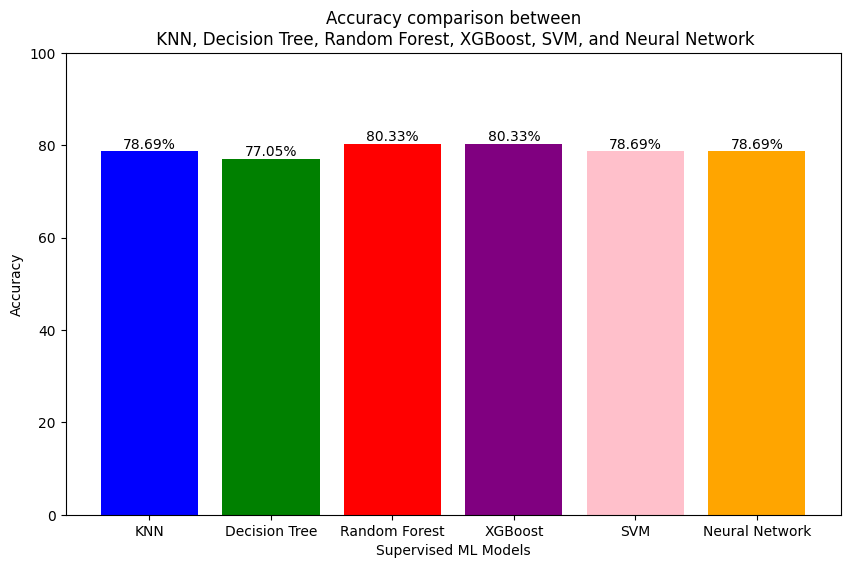

In [ ]:
# Comparison of all accuracies with a bar chart
x_labels = ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'Neural Network']
y_values = [accuracy_knn, accuracy_tree, accuracy_ran_forest, accuracy_xg, accuracy_svm, accuracy_nn]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color=['blue', 'green', 'red', 'purple', 'pink', 'orange'])
# show value on top of each bar
for index, value in enumerate(y_values):
    plt.text(index, value, str(value)+'%', ha='center', va='bottom')

plt.ylim(0, 100)
plt.xlabel('Supervised ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between\n KNN, Decision Tree, Random Forest, XGBoost, SVM, and Neural Network')

plt.show()